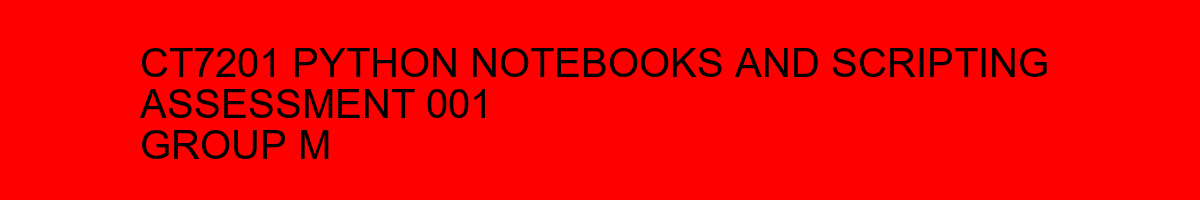

In [63]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# Create a blank image with a white background
width, height = 1200, 200
image = Image.new('RGB', (width, height), 'RED')

# Set up the drawing context
draw = ImageDraw.Draw(image)

# Set up a font
font_size = 40
font = ImageFont.truetype("arial.ttf", font_size)  # You can change the font file and size as needed

# Define your text
text = "CT7201 PYTHON NOTEBOOKS AND SCRIPTING \nASSESSMENT 001 \nGROUP M"

# Calculate text position to center it on the image
text_bbox = draw.textbbox((0, 0), text, font=font)
text_width, text_height = text_bbox[2], text_bbox[3]
x = (width - text_width) // 2
y = (height - text_height) // 2

# Draw the text on the image
draw.text((x, y), text, font=font, fill='black')

# Display the image
display(image)


In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn.impute
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\Aleena Omair\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\Aleena Omair\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\Aleena Omair\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sklearn.impute (from versions: none)
ERROR: No matching distribution found for sklearn.impute

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\Aleena Omair\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\Aleena Omair\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.impute import SimpleImputer

print("Libraries successfully Imported")

ModuleNotFoundError: No module named 'sklearn'

In [8]:
import os
print(os.getcwd())


C:\Users\Aleena Omair


In [11]:
df = pd.read_csv('C:/Users/Aleena Omair/Desktop/survey.csv')

In [13]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [14]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [17]:
df.shape

(1259, 27)

In [19]:
# Check which columns have missing data and find the number of unique features for each column

# Concatenate the information about missing data, number of unique features, and data types
frame = pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis=1, sort=False)

# Display the resulting DataFrame
frame

,0,1,2
Timestamp,0,884,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


In [18]:
if df.isnull().sum().sum() == 0:
    print('There is no missing data in our dataset.')
else:
    # Print the total number of missing data in the dataset
    print('There is {} missing data in our dataset.'.format(df.isnull().sum().sum()))

There is 1892 missing data in our dataset.


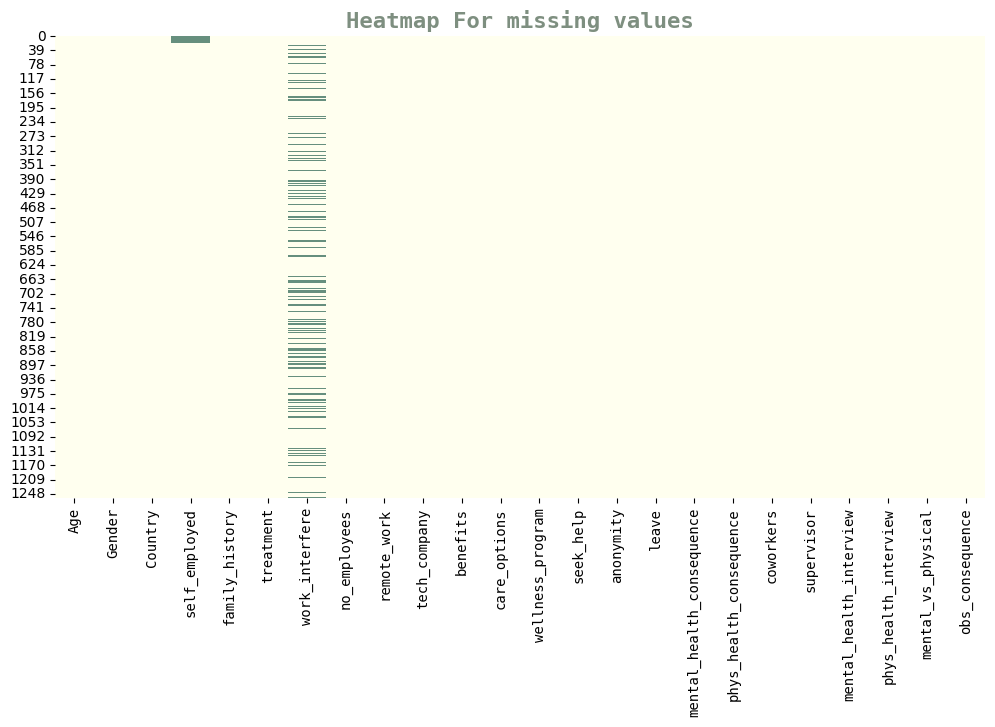

In [31]:
plt.figure(figsize=(12,6) , dpi=100)
snb.heatmap(df.isna(), cmap='YlGn', cbar = False, alpha = 0.6)
plt.xticks(rotation=90)
hfont = {'fontname':'monospace'}
plt.title ('Heatmap For missing values',
           **hfont,
           color = '#29452b',
           weight = 'semibold',
           fontsize = 16,
           alpha = 0.6)
plt.xticks(**hfont)
plt.show()

In [20]:
# Drop columns that are irrelevant for the analysis or contain too much missing data

# List of columns to be dropped
columns_to_drop = ['state', 'comments', 'Timestamp']

# Iterate through each column in the list
for column in columns_to_drop:
    # Check if the column exists in the DataFrame
    if column in df.columns:
        # Drop the specified column
        df = df.drop(columns=[column])

# Display the DataFrame after dropping columns
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [21]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [22]:
#Look at what is in the 'Work_interfere' column to choose a suitable method to fill nan values.
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

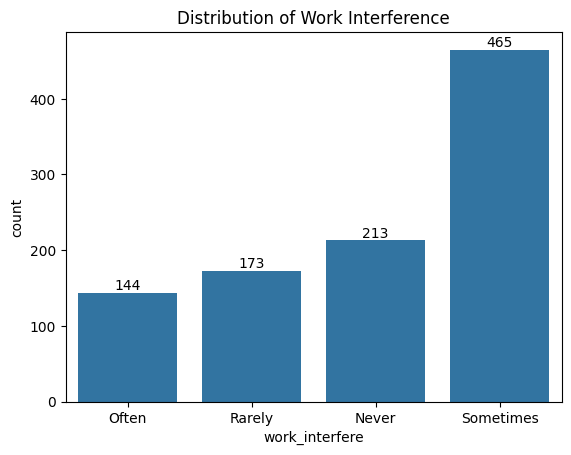

In [24]:
# Plot the distribution of 'work_interfere'

# Create a countplot for the 'work_interfere' column
work_interfere_count_plot = snb.countplot(data=df, x='work_interfere')

# Add labels to the bars in the countplot with the count of occurrences
work_interfere_count_plot.bar_label(work_interfere_count_plot.containers[0])

# Set the title of the plot
plt.title('Distribution of Work Interference')

# Show the plot
plt.show()

In [28]:
# Check the unique values in the 'Gender' column

# Print the unique values in the 'Gender' column
print("Unique values in 'Gender' column:", df['Gender'].unique())

# Print an empty line and a separator for better readability
print('\n' + '-' * 92 + '\n')

# Check the number of unique values in the 'Gender' column

# Print the number of unique values in the 'Gender' column
print('Number of unique values in the "Gender" column:', df['Gender'].nunique())

Unique values in 'Gender' column: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

--------------------------------------------------------------------------------------------

Number of unique values in the "Gender" column: 49


In [29]:
# Cleaning up the 'Gender' column to make it more uniform

# Replace various gender values with standardized categories ('Male', 'Female', 'Other')
df['Gender'].replace( 
    ['Male ', 'male', 'M', 'm', 'Male', 'Cis Male', 'Man', 'cis male', 'Mail',
     'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'],
    'Male', inplace=True
)

df['Gender'].replace(
    ['Female ', 'female', 'F', 'f', 'Woman', 'Female', 'femail', 'Cis Female',
     'cis-female/femme', 'Femake', 'Female (cis)', 'woman'],
    'Female', inplace=True
)

df["Gender"].replace(
    ['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne',
     'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah',
     'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 'p',
     'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman'],
    'Other', inplace=True
)

# Print unique values in the 'Gender' column after cleaning
print("Unique values in 'Gender' column after cleaning:", df['Gender'].unique())

# Print unique values in the 'no_employees' column
print("Unique values in 'no_employees' column:", df['no_employees'].unique())

Unique values in 'Gender' column after cleaning: ['Female' 'Male' 'Other']
Unique values in 'no_employees' column: ['25-Jun' 'More than 1000' '26-100' '100-500' '5-Jan' '500-1000']


In [40]:
#Checking for Different Age Groups

print("The dataset contains different age groups including: \n")
print(df['Age'].unique())
print("\n \n")


The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 



In [41]:
#Removing Negative Age Values

df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

In [42]:
# Exploratory Data Analysis

In [43]:
!pip install Pillow


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\Aleena Omair\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_8620\3419381674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = snb.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')


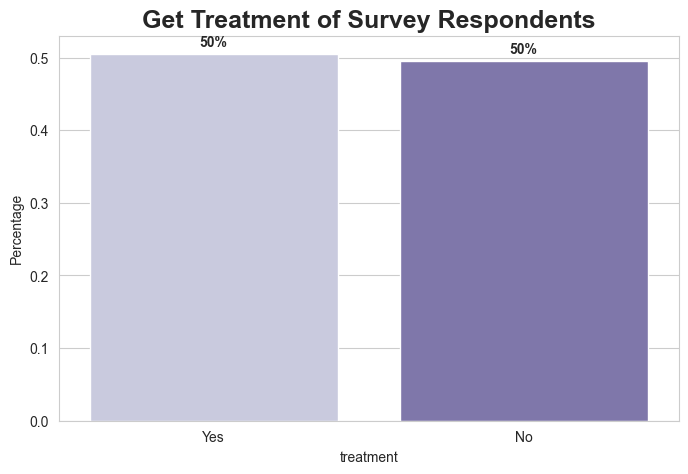

In [65]:
#Plotting whether People sought treatment for a mental health condition?'.

snb.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = snb.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [73]:
from plotly.subplots import make_subplots

In [75]:
import plotly.express as px
import plotly.graph_objects as go

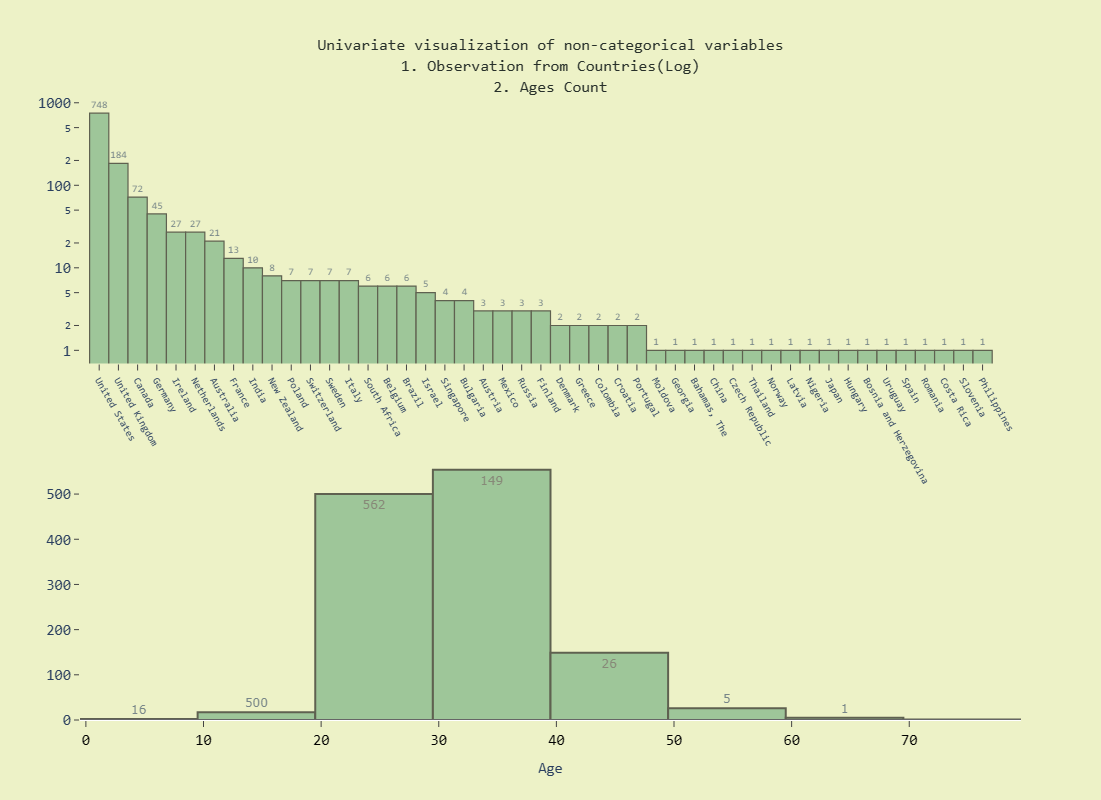

In [92]:
fig = make_subplots(rows = 2, cols=1)

fig.append_trace(go.Bar(
                        y = df['Country'].value_counts(),
                        x = df['Country'].value_counts().index,
                        name = 'Observations from Countries (Log)',
                        text = df['Country'].value_counts(),
                        textfont = dict(size = 10,
                                        family = 'monospace'),
                        textposition = 'outside',
                        marker=dict(color="#6aa87b")
                        ), row=1, col=1)
fig.append_trace(go.Histogram(
                        x = df['Age'],
                        nbinsx = 8,
                        text = ['16', '500', '562', '149', '26', '5', '1'],
                        marker =  dict(color="#6aa87b")),
                        row=2, col=1)
# For Subplot : 1

fig.update_xaxes(
        row=1, col=1,
        tickfont = dict(size=10, family = 'monospace'),
        tickmode = 'array',
        ticktext = df['Country'].value_counts().index,
        tickangle = 60,
        ticklen = 6,
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_yaxes(type = 'log',
        row=1, col=1,
        tickfont = dict(size=15, family = 'monospace'),
        tickmode = 'array',
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_traces(
                  marker_line_color='black',
                  marker_line_width= 1.2,
                  opacity=0.6,
                  row = 1, col = 1)

fig.update_xaxes(range=[-1,48], row = 1, col = 1)
fig.update_xaxes(        
        title = dict(text = 'Age',
                     font = dict(size = 15,
                                 family = 'monospace')),
        row=2, col=1,
        tickfont = dict(size=15, family = 'monospace', color = 'black'),
        tickmode = 'array',
        ticktext = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
        ticklen = 6,
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_yaxes(
        row=2, col=1,
        tickfont = dict(size=15, family = 'monospace'),
        tickmode = 'array',
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_traces(
                  marker_line_color='black',
                  marker_line_width = 2,
                  opacity = 0.6,
                  row = 2, col = 1)


fig.update_layout(height=800, width=900,
                  title = dict(text = 'Univariate visualization of non-categorical variables<br>1. Observation from Countries(Log)<br>2. Ages Count',
                               x = 0.5,
                               font = dict(size = 16, color ='#27302a',
                               family = 'monospace')),
                  plot_bgcolor='#edf2c7',
                  paper_bgcolor = '#edf2c7',
                  showlegend = False)

fig.show()

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_8620\40175557.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_8620\40175557.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




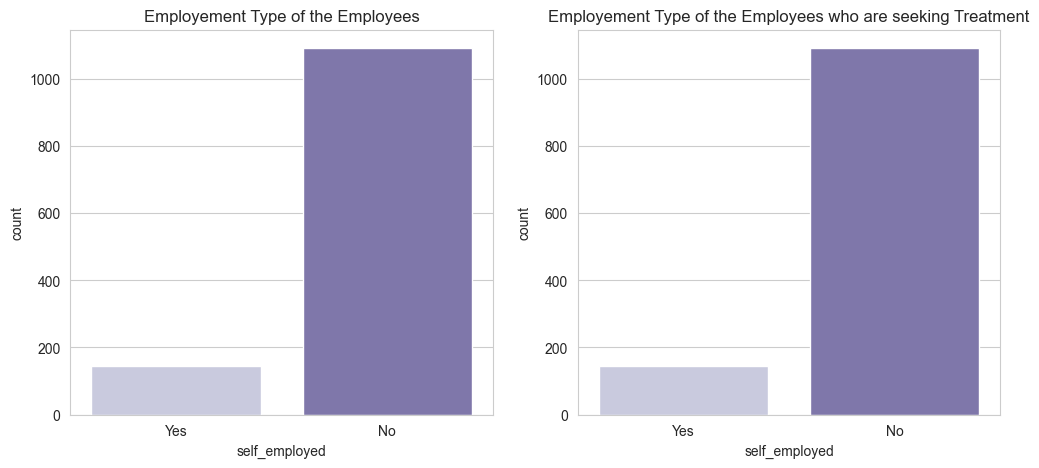

In [84]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot countplot for 'self_employed'
snb.countplot(x='self_employed', data=df, palette='Purples', ax=axes[0])
axes[0].set_title('Employement Type of the Employees')

# Plot countplot for 'treatment'
snb.countplot(x='self_employed', data=df, palette='Purples', ax=axes[1])
axes[1].set_title('Employement Type of the Employees who are seeking Treatment')

plt.show()

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_8620\1497058930.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


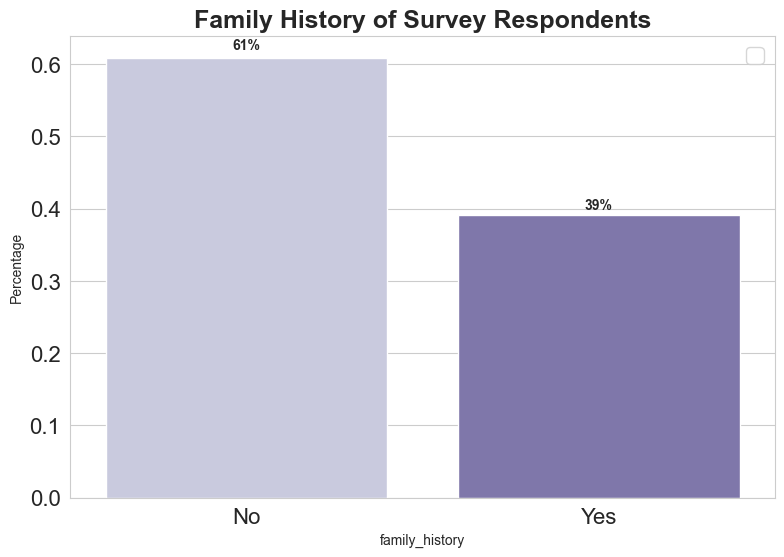

In [86]:
#Family History of Mental Illness of Survey Takers

plt.figure(figsize=(20, 6))

# Subplot 1: Barplot
plt.subplot(1, 2, 1)
eda_percentage = df['family_history'].value_counts(normalize=True).rename_axis('family_history').reset_index(name='Percentage')
ax = snb.barplot(x='family_history', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()


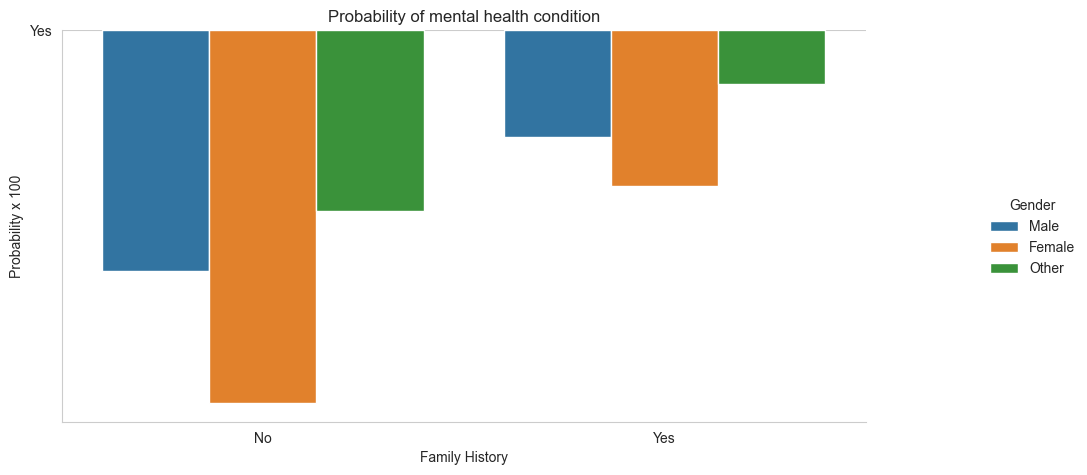

In [108]:



g = snb.catplot(x="family_history", y="treatment", hue="Gender", data=df, kind="bar", errorbar=None, height=5, aspect=2, legend_out=True)

# Set axis titles
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Replace legend labels
new_legend_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_legend_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_8620\863549509.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


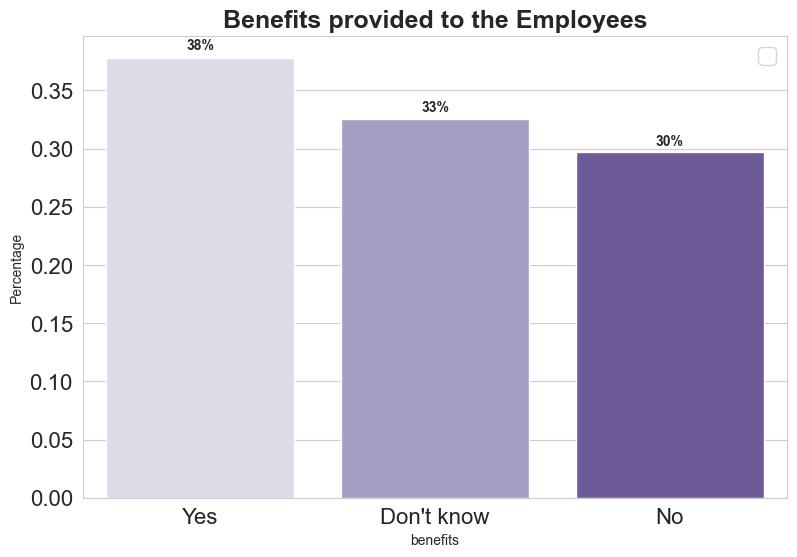

In [94]:


plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = snb.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)



C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_8620\1190059578.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




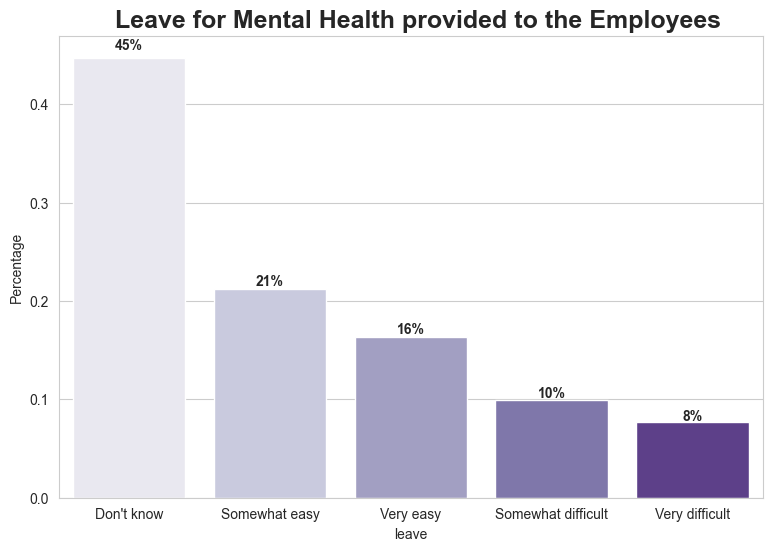

In [97]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = snb.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_8620\2724576896.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Mental or Physical Health')

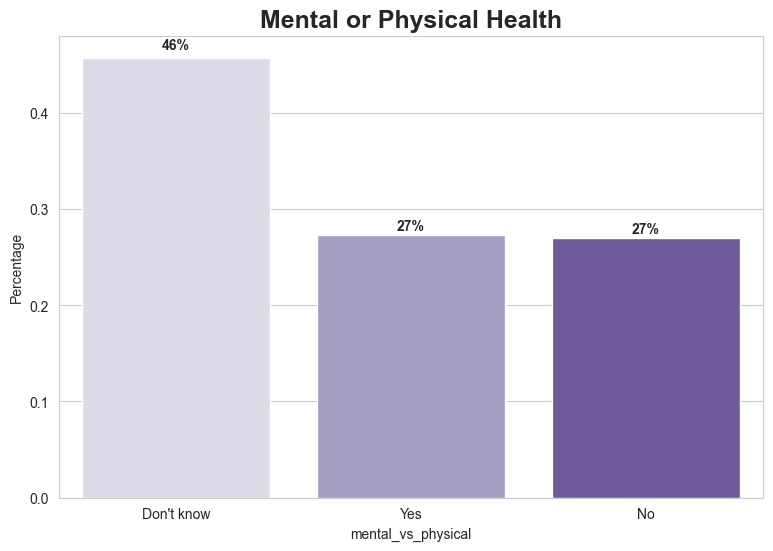

In [98]:
#Do you feel that your employer takes mental health as seriously as physical health?

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = snb.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')